---
author: Rishabh Mondal
title: Introduction to Univariate distribution and Sampling 
date: '2023-07-07'
---

This blog is your gateway to delve into various commonly used univariate sampling. Here, you will find intriguing insights into the stories behind these distributions. For example, you will discover that the outcome of a coin flip follows a Bernoulli distribution. We provide comprehensive information about each distribution, including their probability mass or probability density functions, moments, and 
more. Additionally, we offer implementations of these distributions using PyTorch, allowing you to explore and 
experiment with different flavors and variations of each distribution.

### Pre-defined values

In [1]:
#Important libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.distributions as dist
import math
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### Preliminary study


****Random variables**** : If the value of X is unknown and/or could change, we call it a ***random*** variable or ***rv***. The set of possible values, denoted X, is known as the ***sample space***.

****Discrete rv**** : If the sample space X is finite or countably infinite, then X is called a discrete random variable.

****Continuous rv****: If $X \in \mathbb{R}$ is a real-valued quantity, it is called a continuous random variable.

****Probability mass function or PMF**** : Let $X$ be a discrete rv with possible outcomes 
$\chi$. Then, $f_X(x):R→[0,1]$ is the PMF of X.
$$\sum_{x\in X}f_X = 1$$

****Cumulative distribution function of CDF**** : The cdf random variable $X$ at a given value $x$ is defined as the probability that $X$ is smaller than $x$ : $$F_X(x) = P(X \leq x)$$.

$1.$ If X is a discrete rv with possible outcomes $\chi$ and the pmf $f_X(x)$ then ***cdf*** is the function $F_X(x) : \mathbb{R} \to [0, 1]$ with ,
$$F_X(x) = \sum_{t \in X: t \leq x} f_X(t)$$

$2.$ If X is a continuous rv with possible outcomes $\chi$ and the pdf $f_X(x)$ then ***cdf*** is the function $F_X(x) : \mathbb{R} \to [0, 1]$ with ,
$$F_X(x) = \int_{-\infty}^{x} f_X(t) \, dt$$

****Inverse CDF or Quantile function**** :Let $X$ be a random variable with the CDF $F_X(x)$. Then, the function $Q_X(p) : [0, 1] \to \mathbb{R}$ which is the inverse CDF is the quantile function (QF) of $X$. More precisely, the QF is the function that, for a given quantile $p \in [0, 1]$ , returns the smallest x for which $F_X(x) = p$:
$$Q_X(p) = \min\{x \in \mathbb{R} \,|\, F_X(x) = p\}$$








## Univariate discrete distributions

### Discrete uniform distribution

****Definition**** : Let $X$ be a discrete rv. Then $X$ is said to be uniformly distributed with minimum $a$ and maximum $b$

$$X \sim U(a,b)$$

****Support**** : $(a,b)$

****PDF**** :
$$f_X(x) = \frac{1}{b - a + 1}, \quad \text{where } x \in \{a, a+1, \ldots, b-1, b\}$$

****CDF****:
$$F(x) = \begin{cases}
0 & \text{if } x < a \\
\frac{{x - a}}{{b - a}} & \text{if } a \leq x < b \\
1 & \text{if } x \geq b \\
\end{cases}
$$

****PDF of uniform distribution****

0.16666666666666666


Text(0, 0.5, 'p(x)')

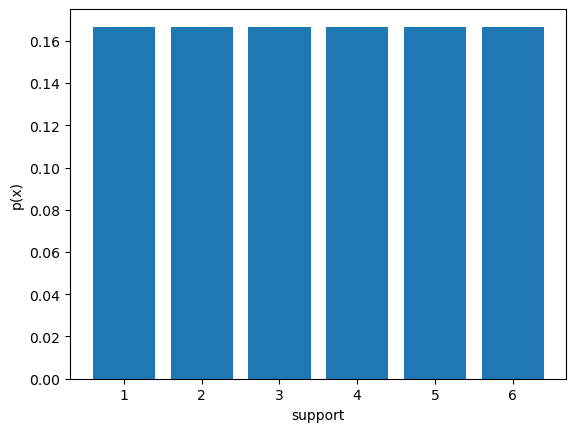

In [40]:
a=1
b=6
sample=torch.randint(low=a,high=(b+1),size=(100,))
pmf = 1 / (b - a + 1)
#print(sample)
print(pmf)
plt.bar(sample,pmf)
plt.xlabel("support")
plt.ylabel("p(x)")

***CDF of uniform distribution***

Text(0, 0.5, 'cdf')

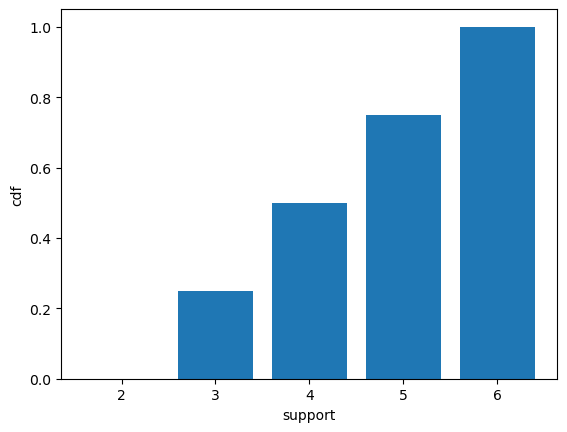

In [39]:
a=2
b=6
sample=torch.randint(low=a,high=(b+1),size=(100,))
cdf = torch.where(sample < a, torch.tensor(0.0), torch.where(sample > b, torch.tensor(1.0), (sample - a) / (b - a)))
#print(cdf)
plt.bar(sample,cdf)
plt.xlabel("support")
plt.ylabel("cdf")

***Inverse CDF of uniform distribution***

Text(0, 0.5, 'inverse cdf')

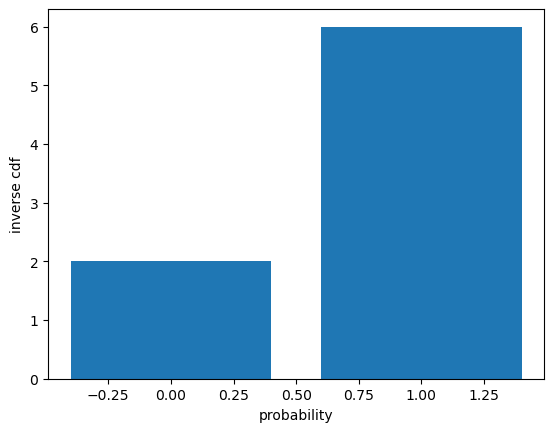

In [60]:
a=2
b=6
probabilities=torch.randint(low=0,high=1+1,size=(100,))
inv_cdf=a+(b-a)*probabilities
plt.bar(probabilities,inv_cdf)
plt.xlabel("probability")
plt.ylabel("inverse cdf")

### Bernoulli distribution 

***Story*** : Bernoulli Distribution is a discrete probability distribution used for experiments with yes/no outcomes. It represents a single trial with two possible outcomes: success (1) with probability p or failure (0) with probability $(1 - p)$. 

***pmf***:
$$
f(x, p) = \begin{cases}
p & \text{if } x = 1 \\
1 - p & \text{if } x = 0 \\
\end{cases}
$$
***Example*** : Flipping a coin. 

3957


Text(0.5, 0, 'categories')

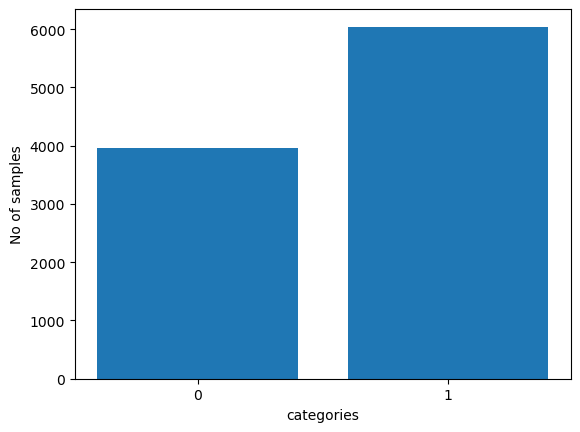

In [5]:
from torch.distributions import Bernoulli
p=torch.tensor(0.4)
bernoulli=Bernoulli(probs=p)
bernoulli_samples = bernoulli.sample((n_samples,))
x=[0,1]
f=[]
s=[]
for i in bernoulli_samples:
    if i == 1:
        s.append(i)
    else:
        f.append(i)   
print(len(s))   
categories=['0','1']
plt.bar(categories,[len(s),len(f)])
plt.ylabel("No of samples")
plt.xlabel("categories")

### Categorical distribution 

***Story*** - In a set of discrete outcomes, each outcome is assigned a probability.

***Example*** - The student has a $p_{a}$ probability of studying, a $p_{b}$ probability of going out with friends, and a $p_{c}$ probability of watching a movie.

***pmf*** :
$$
f(x; p_1, p_2, ..., p_k) = 
\begin{cases}
p_1 & \text{if } x = 1 \\
p_2 & \text{if } x = 2 \\
\vdots \\
p_k & \text{if } x = k \\
\end{cases}
$$

 

tensor([1, 0, 2,  ..., 2, 2, 2])
tensor([2024, 2980, 4996])
3


Text(0.5, 0, 'categories')

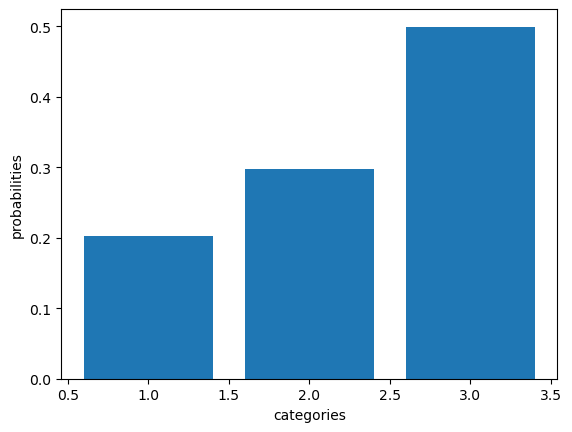

In [6]:
from torch.distributions import Categorical
probs=torch.tensor([0.20,0.30,0.50])
categorical_distribution = Categorical(probs)
categorical_numbers = categorical_distribution.sample((n_samples,))
print(categorical_numbers)
category_counts = torch.bincount(categorical_numbers) #Bincount:count the number of occurrences of each value                                                       #of occurrences of each value
probabilities = category_counts / n_samples
print(category_counts)
print(len(probabilities))
categories = torch.arange(1,len(probabilities)+1)
#print(categories)
plt.bar(categories, probabilities)
plt.ylabel("probabilities")
plt.xlabel("categories")



### Normal distribution 

***Story*** - The normal distribution arises when many small factors contribute to a quantity without any extreme variations, resulting in a bell-shaped curve.

***Example*** - When measuring the heights of a large population, we typically find that the distribution follows a bell-shaped curve, with the majority of individuals clustering around the average height and fewer individuals at the extremes (very tall or very short)

$$
f(x;\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

***Moments***

Mean: $\mu$

Variance: $\sigma^2$

Text(0.5, 0, 'x')

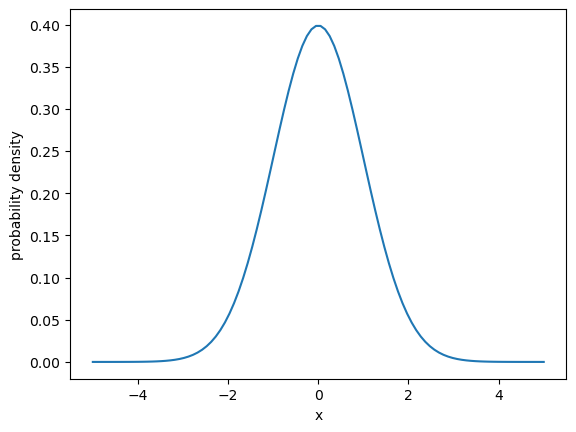

In [7]:
from torch.distributions import Normal
mean = torch.tensor([0.0])
stddev = torch.tensor([1.0])
dist = Normal(mean, stddev)
x = np.linspace(-5, 5, 100)
pdf = torch.exp(dist.log_prob(torch.tensor(x))).numpy()

# Plot the normal distribution
plt.plot(x, pdf)
plt.ylabel("probability density")
plt.xlabel("x")


### Beta distribution

***Story*** : Let's say you have two processes, each consisting of multiple steps. Both processes occur at the same rate, but the first process requires $\alpha$ step and the second process $\beta$ ,the fraction of the total waiting time taken by the first process is Beta distributed .

***Example*** : Include the Click-Through Rate (CTR) of an advertisement, the conversion rate of customers purchasing on your website.

$$f(x; \alpha, \beta) = \frac{x^{\alpha-1} (1-x)^{\beta-1}}{B(\alpha, \beta)}$$

where 

$$B(\alpha, \beta) = \int_0^1 x^{\alpha-1} (1-x)^{\beta-1} dx$$

***Support*** : The Beta distribution has support on the interval [0, 1].

***Moments*** :

$\mu = \frac{\alpha}{\alpha + \beta}$

$\sigma^2 = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$



Text(0, 0.5, 'pdf')

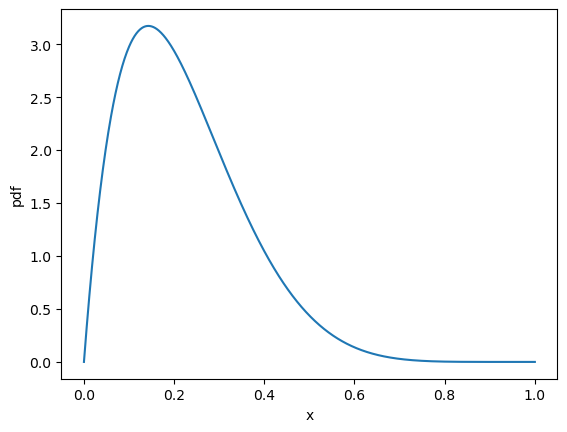

In [8]:
alpha = 2
beta = 7
# Create a Beta distribution object
beta_dist = torch.distributions.Beta(alpha, beta)
x = np.linspace(0, 1, 1000)
pdf = beta_dist.log_prob(torch.tensor(x)).exp()
plt.plot(x, pdf)
plt.xlabel("x")
plt.ylabel("pdf")


### Gamma distrubution


Text(0, 0.5, 'pdf')

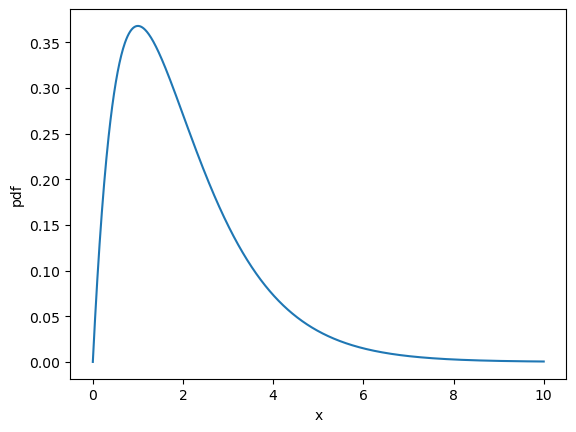

In [9]:
alpha = 2.0
beta = 1.0
gamma_dist = torch.distributions.Gamma(alpha, beta)
x = torch.linspace(0, 10, 1000)
pdf = gamma_dist.log_prob(x).exp()
plt.plot(x,pdf)
plt.xlabel("x")
plt.ylabel("pdf")

### Cumulative Distribution Function (CDF)

### CDF of Uniform distribution

### CDF of Bernoulli distribution

tensor([0.2000, 0.6000, 1.0000])


Text(0.5, 0, 'categories')

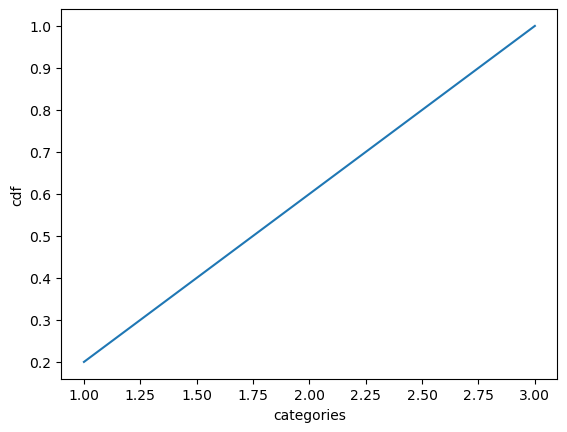

In [11]:
probs=torch.tensor([.20,.40,.40])
cdf = torch.cumsum((probs),dim=0)
print(cdf)
#print(1+len(probabilities))
categories = torch.arange(1,len(probabilities)+1)
plt.plot(categories,cdf)
plt.ylabel("cdf")
plt.xlabel("categories")

### CDF of Normal distribution

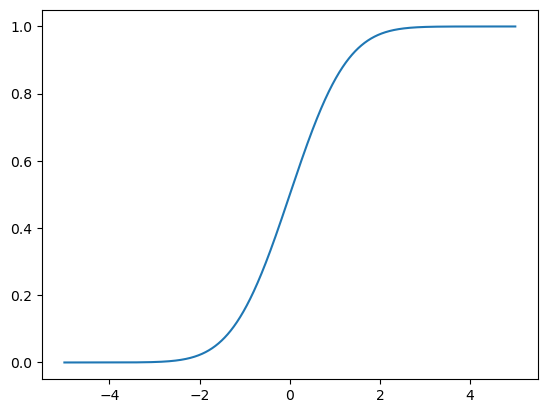

In [12]:
## cdf
from scipy.stats import norm
sample=np.linspace(-5,5,10000)
#print(distribution)
cdf=norm.cdf(sample,loc=0, scale=1)
plt.plot(sample,cdf)

### The Inverse CDF Method


***Story*** : We have discovered that the standard uniform random variable takes on values between 0 and 1 inclusive. The CDF of a (continuous) distribution also takes on values between 0 and 1 inclusive. In addition, the inverse CDF $F^{-1}(x)$
 is also an increasing function (of $x$
).

***Algorithm*** : Obtain or generate a draw $u$ from the standard uniform distribution $U \sim \text{Unif}(0,1)$.

The draw $x$ from the CDF $F(x)$ is given by $x = F^{-1}(u)$.

***Example*** : Suppose we only know how to generate or sample $Unif(0,1)$ random variables. We want to generate $Unif(a,b)$ random variables. The Inverse CDF Method follows -


The CDF of $Unif(a,b)$ is $F(x)= U =\frac{x - a}{b - a}$ for any $x$ in the open interval $(a,b)$.
 
 
The resulting inverse CDF : $F^{-1}(u) = a + (b - a)u$



### Inverse CDF of Uniform distribution

Text(0, 0.5, 'samples')

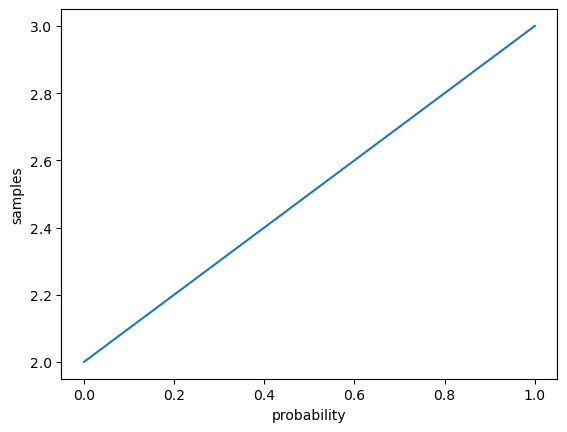

In [13]:
a=2
b=3
probabilities=np.linspace(0,1,1000)
inv_cdf=a+(b-a)*probabilities
#print(inv_cdf)
plt.plot(probabilities,inv_cdf)
plt.xlabel("probability")
plt.ylabel("samples")

### Inverse CDF of Categorical distribution  

In [14]:
#Inverse cdf
probs=torch.tensor([.20,.40,.40])
categories=['1','2','3']
categorical_dist = dist.Categorical(probs)
print(categorical_dist)
sample=categorical_dist.sample()
print(sample.item()) # for value
plt.plot(categories, probs)
plt.xlabel('Categories')
plt.ylabel('Probability')

AttributeError: 'Normal' object has no attribute 'Categorical'

### Inverse CDF of Normal distribution 

Text(0, 0.5, 'Inverse CDF')

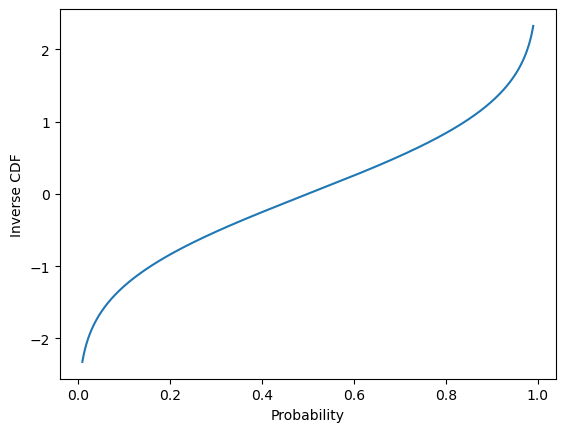

In [ ]:
distribution = np.linspace(0.01, 0.99, 1000)
inv_cdf = norm.ppf(distribution, loc=0, scale=1)
plt.plot(distribution, inv_cdf)
plt.xlabel('Probability')
plt.ylabel('Inverse CDF')

### Implementing a pseudo-random number generator (PRNG)

**Implementing a pseudo-random number generator (PRNG)** - Generates a sequence of numbers that exhibit properties of randomness

**Linear Congruential Generator (LCG)** is a simple PRNG algorithm - The LCG algorithm is defined by the recurrence relation:

$X_{n+1} = (a \cdot X_n + c) \mod m$

- $X_{n+1}$ is the Next pseudo-random number.
- $X_n$ is the current pseudo-random number.
- $a$ is the multiplier , determines the period of the generated number.
- $c$ is the increment, shifts the generated sequence.
- $m$ is the modulus, determines the range of values .


***Integer Constant***

$m,{0<m}$ — The modulus

$a,0<a<m$ — The multiplier

$c,0<=c<m$ — The increment

$X_{0},0<X_{0}<m$ — The seed / start value



In [ ]:
# Function for Linear Congruential Generator
def lcg(seed, n_samples):
    """
    Generates a sequence of pseudo-random numbers using the Linear Congruential Generator (LCG) algorithm.

    Args:
        seed (int): The seed value for the LCG algorithm.
        n_samples (int): The number of random numbers to generate.

    Returns:
        list: A list of pseudo-random numbers normalized to the range [0, 1].
    """
    a = 1103515245
    c = 12345
    m = 2 ** 31
    random_numbers = []

    for _ in range(n_samples):
        seed = (a * seed + c) % m
        random_number = seed / m  # Normalize to range [0, 1]
        random_numbers.append(random_number)

    return random_numbers


Plot histogram

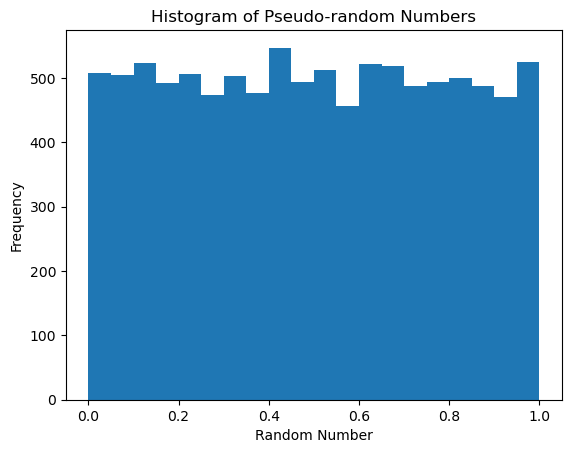

In [ ]:

# Example usage:
random_numbers = lcg(seed, n_samples )

plt.hist(random_numbers, bins=20)
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Pseudo-random Numbers')
plt.show()

### Uniform to Normal sampling

### Box Muller Method

In [23]:
def uniform_to_normal_boxmuller(n_samples):
    """
    Generates a sequence of pseudo-random numbers from a standard normal distribution using the Box-Muller method.

    Args:
        n_samples (int): The number of random numbers to generate.

    Returns:
        torch.Tensor: A tensor of pseudo-random numbers following the standard normal distribution.
    """
    uniform_distribution = dist.Uniform(0, 1)
    random_numbers = []

    for _ in range(n_samples // 2):
        u1 = uniform_distribution.sample()
        u2 = uniform_distribution.sample()

        z1 = torch.sqrt(-2 * torch.log(u1)) * torch.cos(2 * math.pi * u2)
        z2 = torch.sqrt(-2 * torch.log(u1)) * torch.sin(2 * math.pi * u2)

        random_numbers.append(z1)
        random_numbers.append(z2)

    if n_samples % 2 != 0:
        u = uniform_distribution.sample()
        z = torch.sqrt(-2 * torch.log(u)) * torch.cos(2 * math.pi * uniform_distribution.sample())
        random_numbers.append(z)

    return torch.stack(random_numbers)

In [24]:
u=torch.rand(1000)
uniform_to_normal_boxmuller(1000)
plt.plot(random_numbers,u)
plt.xlabel("x")
plt.ylabel("uniform distribution")

NameError: name 'random_numbers' is not defined

### Uniform distribution to beta sampling  

Text(0, 0.5, 'uniform distribution')

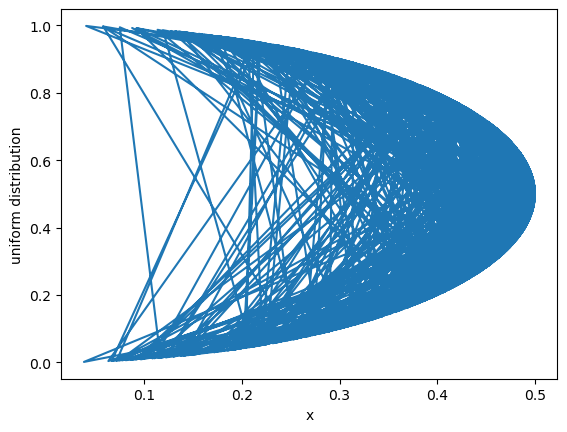

In [20]:
alpha=2
beta=2
u=torch.rand(1000)
x=(1-u)**(1/alpha) * u**(1/beta)
plt.plot(x,u)
plt.xlabel("x")
plt.ylabel("uniform distribution")



### uniform to gamma distribution 

In ***Normal Distribution*** Values are ***symmetrically distributed*** around a central mean. For example, heights in a population follow a ***bell-shaped*** curve, with the most common values near the mean and fewer occurrences as we move away from it. Graphically, it is represented by a bell-shaped curve.

### (0,1) -> (a,b)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the mean and standard deviation of the original normal distribution
mu = 0
sigma = 1

# Set the desired mean and standard deviation of the converted normal distribution
a = 5
b = 2

# Generate random samples from the standard normal distribution
x = np.random.normal(mu, sigma, 1000)

# Apply the transformation to convert to the desired normal distribution
y = a + b * x

# Plot the histogram of the converted normal distribution
plt.hist(y, bins=20, density=True, alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Normal Distribution: μ = {a}, σ = {b}')
plt.show()


In [ ]:
mu = 0
sigma = 1

# Set the desired mean and standard deviation of the converted normal distribution
a = 5
b = 2

# Create a normal distribution with the original mean and standard deviation
original_dist = torch.distributions.Normal(mu, sigma)

# Generate random samples from the original normal distribution
samples = original_dist.sample((10000,))

# Apply the transformation to convert to the desired normal distribution
converted_samples = a + b * samples

# Create a normal distribution with the desired mean and standard deviation
converted_dist = torch.distributions.Normal(a, b)

# Plot the histogram of the converted normal distribution
plt.hist(converted_samples.numpy(), bins=20, density=True, alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Normal Distribution: μ = {a}, σ = {b}')
plt.show()
